# <center> Independent Exploratory Data Analysis </center>

The objective of this notebook is to conduct a deeper analysis on weather data collected from a **single** city, in **2024**. Here, data from the **capital city, Delhi** will be used.

This data analysis involves understanding the data at a deeper level:
- Analyzing relationships between weather features, such as temperature vs humidity/cloud cover
- Visualizations such as heatmaps, lag relationships and histograms
- Identifying extreme weather conditions and when they occured
- Descriptive statistics (mean, median, percentiles)

Data visualization libraries used are matplotlib and seaborn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv("Delhi_Delhi.csv")
data['Date'] = pd.to_datetime(data['Date'])
data['AQI_Category'] = data['AQI_Category'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  731 non-null    datetime64[ns]
 1   City_State            731 non-null    object        
 2   Temperature_Max (°C)  731 non-null    float64       
 3   Temperature_Min (°C)  731 non-null    float64       
 4   Temperature_Avg (°C)  731 non-null    float64       
 5   Humidity (%)          731 non-null    float64       
 6   Rainfall (mm)         731 non-null    float64       
 7   Wind_Speed (km/h)     731 non-null    float64       
 8   AQI                   731 non-null    int64         
 9   AQI_Category          731 non-null    category      
 10  Pressure (hPa)        731 non-null    float64       
 11  Cloud_Cover (%)       731 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(8), int64(1), object(1)
memory usag

In [2]:
# Remove the City_State column
data = data.drop(columns=['City_State'])

# Keep only weather records in 2024
print(len(data))
df = data.loc[data['Date']<'2025-01-01']
print(len(df))
# There should only be 366 records, corresponding to 365 days in a year + the header row, and the last record must be the 31st of December 2024.
df.tail()

731
366


,Date,Temperature_Max (°C),Temperature_Min (°C),Temperature_Avg (°C),Humidity (%),Rainfall (mm),Wind_Speed (km/h),AQI,AQI_Category,Pressure (hPa),Cloud_Cover (%)
361,2024-12-27,33.3,19.2,26.2,71.9,5.7,17.8,333,Very Poor,1012.4,30.5
362,2024-12-28,32.7,24.1,28.4,40.4,37.0,22.7,226,Poor,996.8,53.0
363,2024-12-29,38.0,25.5,31.8,74.0,0.0,9.9,190,Moderate,998.1,18.5
364,2024-12-30,34.6,27.7,31.1,47.6,0.0,5.0,176,Moderate,1022.0,7.8
365,2024-12-31,29.3,20.6,24.9,51.4,0.0,23.6,76,Satisfactory,1003.7,24.4


### **Feature relationships**

The weather features we can work with include:
- Daily Temperature (Max, Min and Avg)
- Humidity (Average relative humidity)
- Rainfall (Daily rainfall amount)
- Wind speed (Average wind speed)
- AQI (Air quality index) as a numerical measure of air pollution and AQI category (grouping the measure into a category ranging from Good to Severe)
- Atmospheric pressure
- Cloud cover as a percentage

### Air quality

First, let us understand the AQI categories and the daily AQI readings.

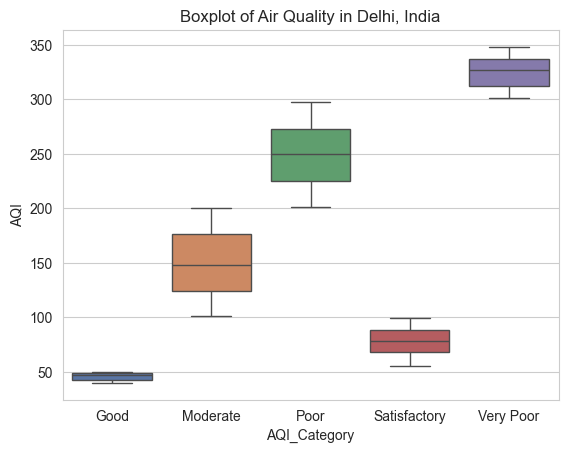

In [8]:
# How many AQI categories does the data have?
pt = sns.boxplot(df, x="AQI_Category", y="AQI", palette="deep", hue="AQI_Category", legend=False)
pt.set_title("Boxplot of Air Quality in Delhi, India")
plt.show()

There are 5 categories of air quality in the capital city in 2024, with their AQI ranges, as shown in the boxplot above.

A different visualization below shows a clearer cluster of data points within a range of AQI values, one for each AQI category.

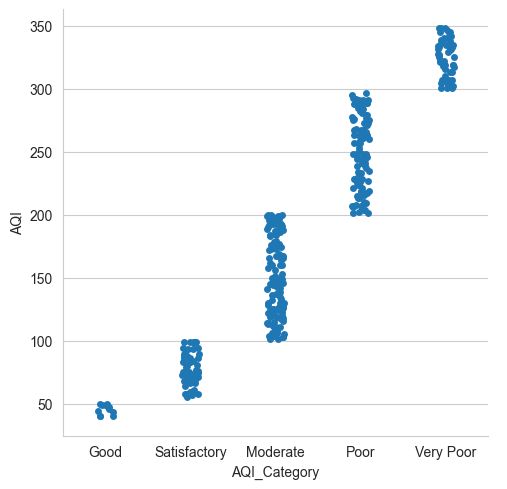

In [7]:
# Categorical scatterplot
ordered = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor']
sns.catplot(data=df, x="AQI_Category", y="AQI", order = ordered)
plt.show()

With the information above, we know that there are five categories of air quality, with "Good" representing the best air quality and "Very Poor" representing the worst, with each category sandwiched inside a range of AQI values:
- Good: 0 < value <= 50
- Satisfactory: 50 < value <= 100
- Moderate: 100 < value <= 200
- Poor: 200 < value <= 300
- Very Poor: 300 < value <= 350

A better visualization will be to visualize categories by their frequency (the number of days of which the air quality is poor/moderate/etc)?

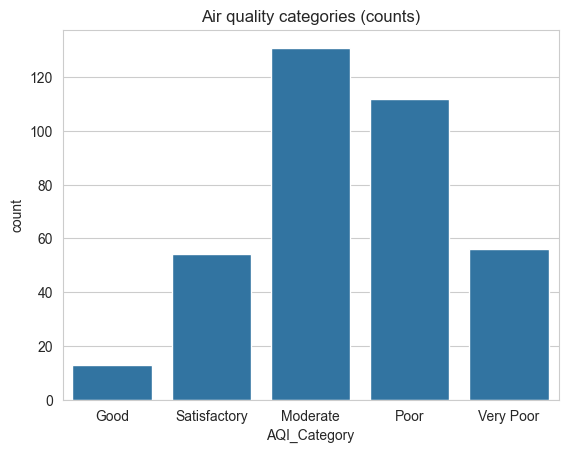

In [9]:
sns.countplot(df, x = "AQI_Category", order=ordered)
plt.title("Air quality categories (counts)")
plt.show()

The histogram above shows a unimodal distribution; the most frequent AQI category registered daily is Moderate, and as the AQI decreases or increases in either direction, the number of days corresponding to the category falls.

It is worth noting that the distribution is skewed to the right; there are more days with poor and very poor air quality compared to the number of days with good and satisfactory air quality.

Finally, let us analyze the trend of air quality across all months in 2024.

We need to condense the AQI categories/values into one common value that describes the air quality of that month as a whole (summary). There are many ways to do this; take the average AQI reading/take the mode for AQI category (highest frequency of AQI category in that month).

Secondly, let us analyze the humidity and rainfall readings of the data. Humidity is in % and rainfall is in mm.